<a href="https://colab.research.google.com/github/keshav123333/Machine_learning_100_campusx/blob/main/pca/PCA_Feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# feature creation

isme hum naye feature create

example ->

1. if pura name toh mr miss alag kar lo if mrs so married and if miss toh unmarried aise dabpe laga sakte

     
```
 df['ismarried']=0;
      df.loc[df['Name'].str.contains("Mr."), 'ismarried'] = 1
      df.loc[df['Name'].str.contains("Mrs."), 'ismarried'] = 1

```



# curse of dimentionality

high dimention data bhi bekar kyon as maan kitna jayda dimesion data utna sparse so har feture pe utna dhyan ni upar se if maan dimension increase so main problem ek aur ki ek feaure dusre feaure se bahut dur hota jayega and target pe dependency bhi dec

computation inc and performance dec so

methods ->


feature extraction->
pca

feature selection -> ye niche wala

#PCA


```
benfits ->
 its like u capture a 3d world photo so 3d to 2d karte

 1. so dim reduce karke without loosing the info
 2. higher to lower dim
```



 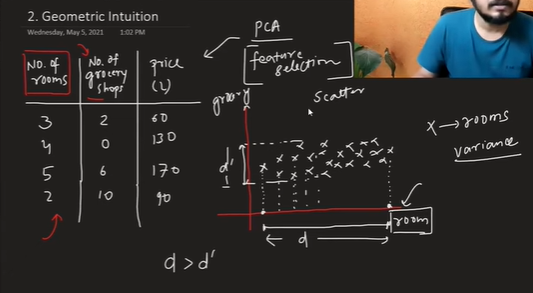


 so har col ko dusri col se plot an jo bade area mein vo zaruri like yaha pe no. of rooms grocery store mein no. of room more are or line mein

 jo co jayda vary variance vo

upar tha feature selection kar ahe ab hum karenge feature extraction
example -: no. of rooms and no. of wasroom diya so in dono ko merge kar ke ek col bana room size jo pca laga de in dono pe

**why variance is important?**

ans ->  kyonki hum pca mein bhi variance hi nikalte isse hum dekhte ke data kitna spread hua hai. Ques may arise then why not mean absolute deviation kyon ni use karte spread ke liye as |mod| use hota hai usme, so ni kar skte use as ye differentiable ni hai na


end goal is to maxmize the variance



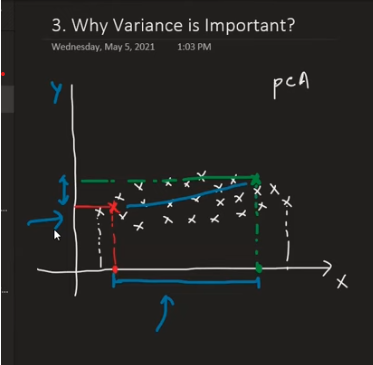

  1. jaise upar vali photo mein ek side se red gren pt ke bich ka diff alag and x axis pe alga se isliye variance maximize karte as y axis wale se toh dist pata ni chal sakti x axis wale se fir bhi idea lag jayega kitna dist so isliye x axis wala leng as vaha variance jayda

[link text](https://www.youtube.com/watch?v=tXXnxjj2wM4&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=48)
video dekh imp

ab main vo pca manually karunga video dekh usme diya hai kaise karne hai filhal ye karunga ye notebook hai manually pca karne ke liye-:  [link text](https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day47-pca/pca_step_by_step%20(1).ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/refs/heads/main/data/train.csv")

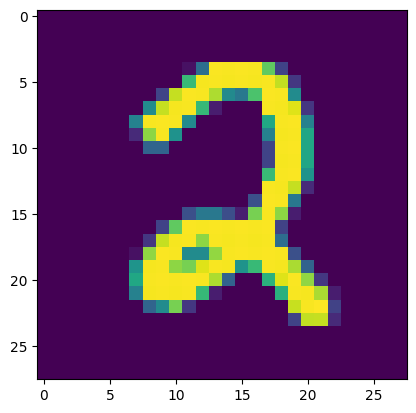

In [3]:
plt.imshow(df.iloc[1800,1:].values.reshape(28,28))

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [6]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

pca

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)


In [8]:
print(xtrain.shape)#pehle shape 784 col
xtrain=pca.fit_transform(xtrain)
xtest=pca.transform(xtest)
print(xtrain.shape)

(33600, 784)
(33600, 50)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)

In [10]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [11]:
pred=knn.predict(xtest)

In [12]:
from sklearn.metrics import accuracy_score

for loop laga le

In [13]:
accuracy_score(ytest,pred)

0.9538095238095238

from sklearn.model_selection import cross_val_score padh iske baare mein

visulization

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

pca

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)


In [18]:
xtrain=pca.fit_transform(xtrain)


In [19]:
import plotly.express as px

fig=px.scatter_3d(x=xtrain[:,0],y=xtrain[:,1],z=xtrain[:,2],color=ytrain)
fig.show()

how to chosse best n_component for best result

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2)

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)


In [26]:
print(xtrain.shape)#pehle shape 784 col
xtrain=pca.fit_transform(xtrain)
xtest=pca.transform(xtest)
print(xtrain.shape)

(33600, 784)
(33600, 784)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)

In [28]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

ye bana le isme 90 percent jiss component pe usse chun le

In [31]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# example: agar tumhara pca object bana hua hai (sklearn PCA)
# pca = PCA().fit(X)   # agar already fit hai to skip this line

# agar tumhare paas pca.explained_variance_ratio_ hai:
explained = pca.explained_variance_ratio_  # 1D numpy array
cum_explained = np.cumsum(explained)

# prepare dataframe for nicer labels on hover
df = pd.DataFrame({
    "component": np.arange(1, len(cum_explained) + 1),
    "cumulative_variance": cum_explained
})

# simple Plotly Express line (interactive)
fig = px.line(
    df,
    x="component",
    y="cumulative_variance",
    markers=True,
    labels={"component": "Principal Component", "cumulative_variance": "Cumulative Explained Variance"},
    title="Cumulative Explained Variance by Principal Components"
)

# custom hover and layout polish
fig.update_traces(
    hovertemplate=
    "PC %{x}<br>Cumulative variance: %{y:.4f}<extra></extra>"
)

fig.update_layout(
    hovermode="x unified",            # single hover box for same x
    xaxis=dict(tickmode="linear"),
    yaxis=dict(tickformat=".2f"),
    template="plotly_white",
    margin=dict(l=40, r=20, t=60, b=40)
)

# add range slider (optional)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangemode="tozero"
    )
)

fig.show()

# agar tumhe ek static file chahiye jo share kar sako:
# fig.write_html("pca_cumulative_explained.html", include_plotlyjs="cdn")
